In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('./Metals_and_Mining_mod.csv')

# Replace null values with 0
df.fillna(0, inplace=True)

# Print the data
print(df)

            Date    Symbol Series  Prev Close    Open    High     Low    Last  \
0     2015-01-01      VEDL     EQ      214.50  213.70  219.70  212.20  219.20   
1     2015-01-02      VEDL     EQ      219.25  219.35  224.45  219.35  222.40   
2     2015-01-05      VEDL     EQ      222.30  222.50  225.30  218.10  219.50   
3     2015-01-06      VEDL     EQ      219.80  217.95  219.50  206.75  208.10   
4     2015-01-07      VEDL     EQ      209.05  209.00  211.85  204.15  209.05   
...          ...       ...    ...         ...     ...     ...     ...     ...   
6259  2021-04-26  JSWSTEEL     EQ      635.40  642.00  660.70  638.25  657.00   
6260  2021-04-27  JSWSTEEL     EQ      655.80  660.65  670.35  658.00  666.35   
6261  2021-04-28  JSWSTEEL     EQ      665.90  669.75  676.00  650.65  662.50   
6262  2021-04-29  JSWSTEEL     EQ      662.65  672.00  728.90  668.05  726.20   
6263  2021-04-30  JSWSTEEL     EQ      726.50  719.60  740.00  711.45  713.70   

       Close    VWAP    Vol

In [3]:
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data.iloc[i:(i + sequence_length)].values
        y = data.iloc[i + sequence_length].values
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


In [4]:
def train_model_for_stock(stock_df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_df['Close'].values.reshape(-1,1))

    sequence_length = 60
    X, y = create_sequences(pd.DataFrame(scaled_data), sequence_length)

    # Split data into training and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build the LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, batch_size=32, epochs=20)

    # Calculate RMSE and MSE for training
    trainPredict = model.predict(X_train)
    trainScore_RMSE = sqrt(mean_squared_error(y_train, trainPredict))
    trainScore_MSE = mean_squared_error(y_train, trainPredict)

    # Calculate RMSE and MSE for testing
    testPredict = model.predict(X_test)
    testScore_RMSE = sqrt(mean_squared_error(y_test, testPredict))
    testScore_MSE = mean_squared_error(y_test, testPredict)

    return trainScore_RMSE, trainScore_MSE, testScore_RMSE, testScore_MSE, scaler.inverse_transform(testPredict), y_test, scaler.inverse_transform(y_test)

In [5]:
def plot_predictions(stock_name, true_values, predictions):
    plt.figure(figsize=(14,7))
    plt.plot(true_values, label='Actual Close Price')
    plt.plot(predictions, label='Predicted Close Price', alpha=0.7)
    plt.title(f'{stock_name} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

In [6]:
# Create a DataFrame to store the RMSE and MSE values
# Columns: 'Stock', 'Train_RMSE', 'Train_MSE', 'Test_RMSE', 'Test_MSE'
performance_df = pd.DataFrame(columns=['Stock', 'Train_RMaSE', 'Train_MSE', 'Test_RMSE', 'Test_MSE'])

Processing VEDL...
Epoch 1/20
38/38 [==============================] - 5s 34ms/step - loss: 0.0262
Epoch 2/20
38/38 [==============================] - 1s 33ms/step - loss: 0.0022
Epoch 3/20
38/38 [==============================] - 2s 41ms/step - loss: 0.0016
Epoch 4/20
38/38 [==============================] - 2s 45ms/step - loss: 0.0015
Epoch 5/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0014
Epoch 6/20
38/38 [==============================] - 2s 40ms/step - loss: 0.0014
Epoch 7/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0014
Epoch 8/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0013
Epoch 9/20
38/38 [==============================] - 1s 32ms/step - loss: 0.0012
Epoch 10/20
38/38 [==============================] - 1s 33ms/step - loss: 0.0012
Epoch 11/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0011
Epoch 12/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0011
Epoch 13/20
38/38 

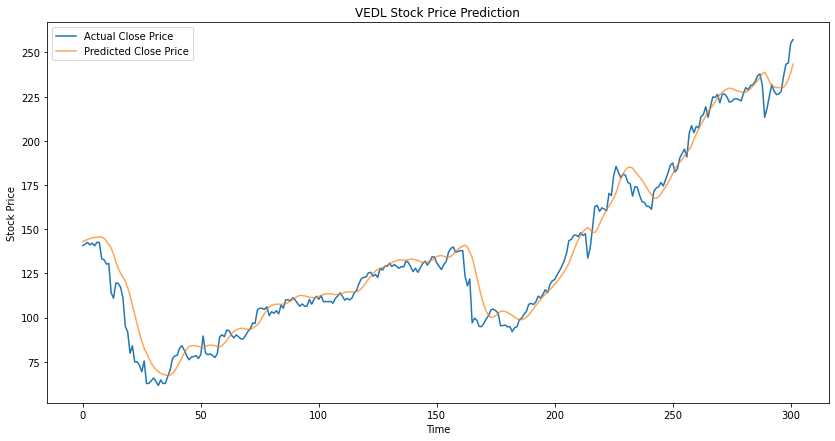

Processing TATASTEEL...
Epoch 1/20
38/38 [==============================] - 5s 35ms/step - loss: 0.0068
Epoch 2/20
38/38 [==============================] - 1s 36ms/step - loss: 6.8752e-04
Epoch 3/20
38/38 [==============================] - 1s 33ms/step - loss: 5.9025e-04
Epoch 4/20
38/38 [==============================] - 1s 33ms/step - loss: 5.6867e-04
Epoch 5/20
38/38 [==============================] - 1s 35ms/step - loss: 5.3832e-04
Epoch 6/20
38/38 [==============================] - 1s 38ms/step - loss: 5.2200e-04
Epoch 7/20
38/38 [==============================] - 1s 33ms/step - loss: 5.3129e-04
Epoch 8/20
38/38 [==============================] - 1s 40ms/step - loss: 5.1527e-04
Epoch 9/20
38/38 [==============================] - 1s 32ms/step - loss: 4.6508e-04
Epoch 10/20
38/38 [==============================] - 1s 36ms/step - loss: 4.4866e-04
Epoch 11/20
38/38 [==============================] - 1s 34ms/step - loss: 4.6368e-04
Epoch 12/20
38/38 [==============================] - 1

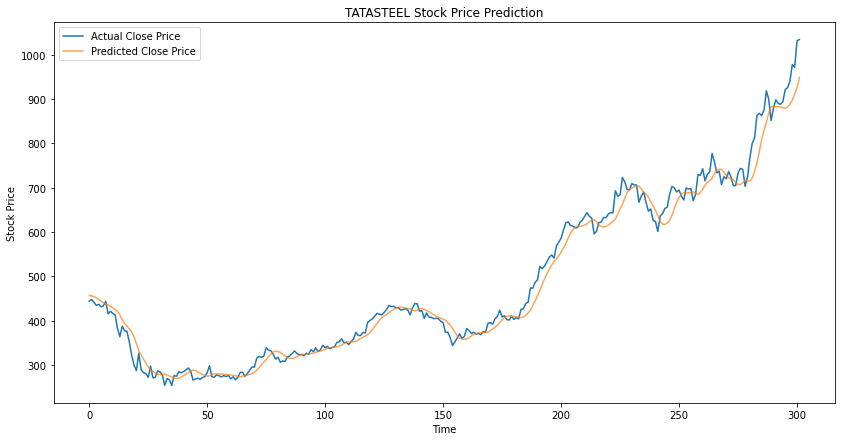

Processing HINDALCO...
Epoch 1/20
38/38 [==============================] - 5s 32ms/step - loss: 0.0135
Epoch 2/20
38/38 [==============================] - 1s 34ms/step - loss: 9.7662e-04
Epoch 3/20
38/38 [==============================] - 1s 32ms/step - loss: 8.0311e-04
Epoch 4/20
38/38 [==============================] - 1s 33ms/step - loss: 7.7206e-04
Epoch 5/20
38/38 [==============================] - 1s 34ms/step - loss: 7.6911e-04
Epoch 6/20
38/38 [==============================] - 1s 31ms/step - loss: 7.3764e-04
Epoch 7/20
38/38 [==============================] - 1s 34ms/step - loss: 6.9853e-04
Epoch 8/20
38/38 [==============================] - 1s 32ms/step - loss: 6.6838e-04
Epoch 9/20
38/38 [==============================] - 1s 33ms/step - loss: 6.5751e-04
Epoch 10/20
38/38 [==============================] - 1s 34ms/step - loss: 6.3692e-04
Epoch 11/20
38/38 [==============================] - 1s 31ms/step - loss: 6.7772e-04
Epoch 12/20
38/38 [==============================] - 1s

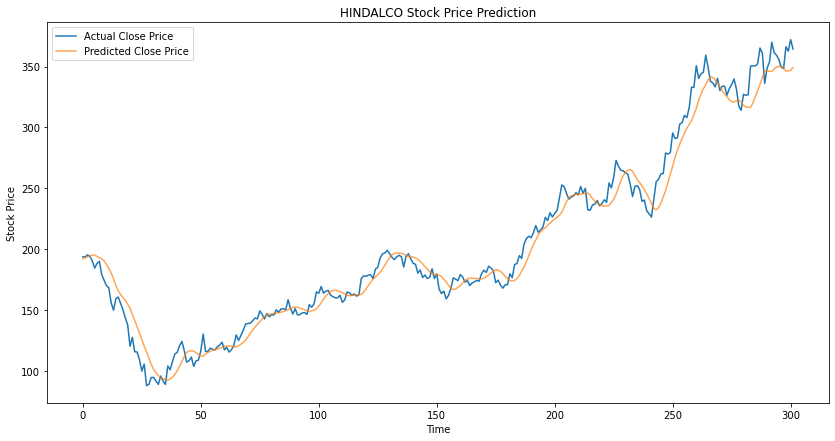

Processing JSWSTEEL...
Epoch 1/20
38/38 [==============================] - 5s 35ms/step - loss: 0.0242
Epoch 2/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0037
Epoch 3/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0031
Epoch 4/20
38/38 [==============================] - 1s 39ms/step - loss: 0.0027
Epoch 5/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0027
Epoch 6/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0024
Epoch 7/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0022
Epoch 8/20
38/38 [==============================] - 1s 32ms/step - loss: 0.0023
Epoch 9/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0022
Epoch 10/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0020
Epoch 11/20
38/38 [==============================] - 1s 32ms/step - loss: 0.0021
Epoch 12/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0021
Epoch 13/20
38

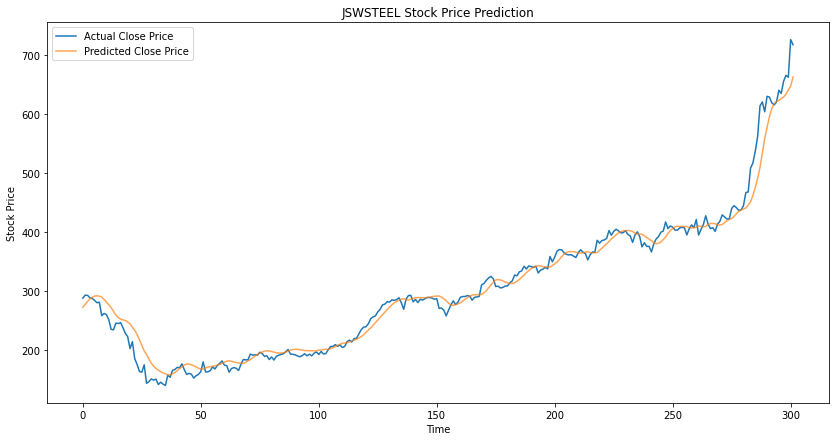

In [7]:
unique_stocks = df['Symbol'].unique()

# Initialize an empty list to store performance metrics for each stock
performance_list = []

for stock in unique_stocks:
    stock_df = df[df['Symbol'] == stock]
    if len(stock_df) > 2 * 60:  # Ensure there's enough data
        print(f"Processing {stock}...")
        trainScore_RMSE, trainScore_MSE, testScore_RMSE, testScore_MSE, predictions, y_test, true_values = train_model_for_stock(stock_df)
        plot_predictions(stock, true_values, predictions)
        
        # Create a dictionary with the performance metrics
        current_stock_performance = {
            'Stock': stock,  # Replace with the actual stock name
            'Train_RMSE': trainScore_RMSE,
            'Train_MSE': trainScore_MSE,
            'Test_RMSE': testScore_RMSE,
            'Test_MSE': testScore_MSE
        }
        
        # Append the dictionary to the list
        performance_list.append(current_stock_performance)

# Create a DataFrame from the list of dictionaries
performance_df = pd.DataFrame(performance_list)

# Now 'performance_df' contains the RMSE and MSE values for all stocks

In [8]:
performance_df

,Stock,Train_RMSE,Train_MSE,Test_RMSE,Test_MSE
0,VEDL,0.031004,0.000961,0.029628,0.000878
1,TATASTEEL,0.018357,0.000337,0.031371,0.000984
2,HINDALCO,0.020290,0.000412,0.037737,0.001424
3,JSWSTEEL,0.035283,0.001245,0.010701,0.000115
